In [2]:
import numpy as np
from matplotlib import pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"

 

In [5]:
t = np.linspace(0, 1, 1001)
x = np.linspace(0, 1, 11)



p = 5

n_t, n_x = len(t), len(x)


def U(t, x = 0.5):
    return 2 * (x**4) - 3 * (t**3) + 3*(t**2)*x - 2*np.exp(x)

def f(x, t, a = 0.024): 
    return -9 * (t**2) + 6*t*x - a*(24*(x**2) - 2*np.exp(x))


def bw_euler(x, t, a = 0.024):
    dx, dt = 1/(len(x)-1), 1/(len(t)-1)

    mu = ((-a)*dt)/(dx*dx)
    
    u0, b1, b2 = U(0, x), U(t, 0), U(t, 1)
    B = np.zeros((n_x, n_x))
    B[0][0], B[-1][-1] = 1, 1
    
    for i in range(1, n_x-1):
        B[i][i-1], B[i][i], B[i][i+1] = mu, (1 - 2*mu), mu
        
   
    u_ = np.zeros((n_t, n_x))
    u_[0] = u0
    
    v  = np.zeros(n_x) 


    for i in range(1, n_t):
        v[0], v[-1] = b1[i], b2[i]
        v[1:-1] = (dt * f(x[1:-1], np.array([t[i]for k in range((n_x-2))]))) + u_[i-1][1:-1]
        u_[i] = np.linalg.solve(B,v)
    

        
   
    return u_





CPU times: user 52.2 ms, sys: 9.64 ms, total: 61.9 ms
Wall time: 57.1 ms


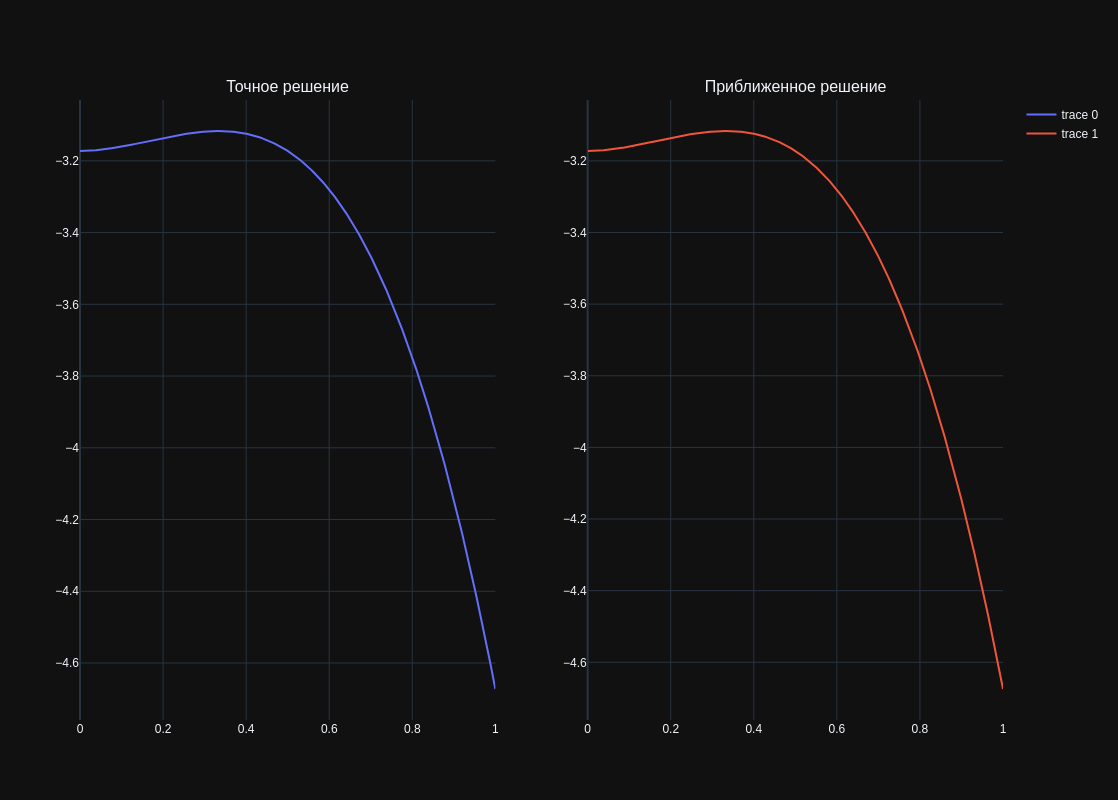

In [7]:

X, Y = np.meshgrid(t, x)
%time y1 = bw_euler(x,t)


z = [y1[i][5] for i in range(n_t)]



fig = make_subplots(
    rows=1, cols=2,
   subplot_titles = [ "Точное решение", "Приближенное решение"])

fig.add_trace(
    go.Scatter(x=t, y=U(t)),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=t, y=z),
    row=1, col=2)

fig.update_layout(
    #scene = dict(aspectmode='cube'),
    height=800,
    #width=800
    
    
)
fig.show()




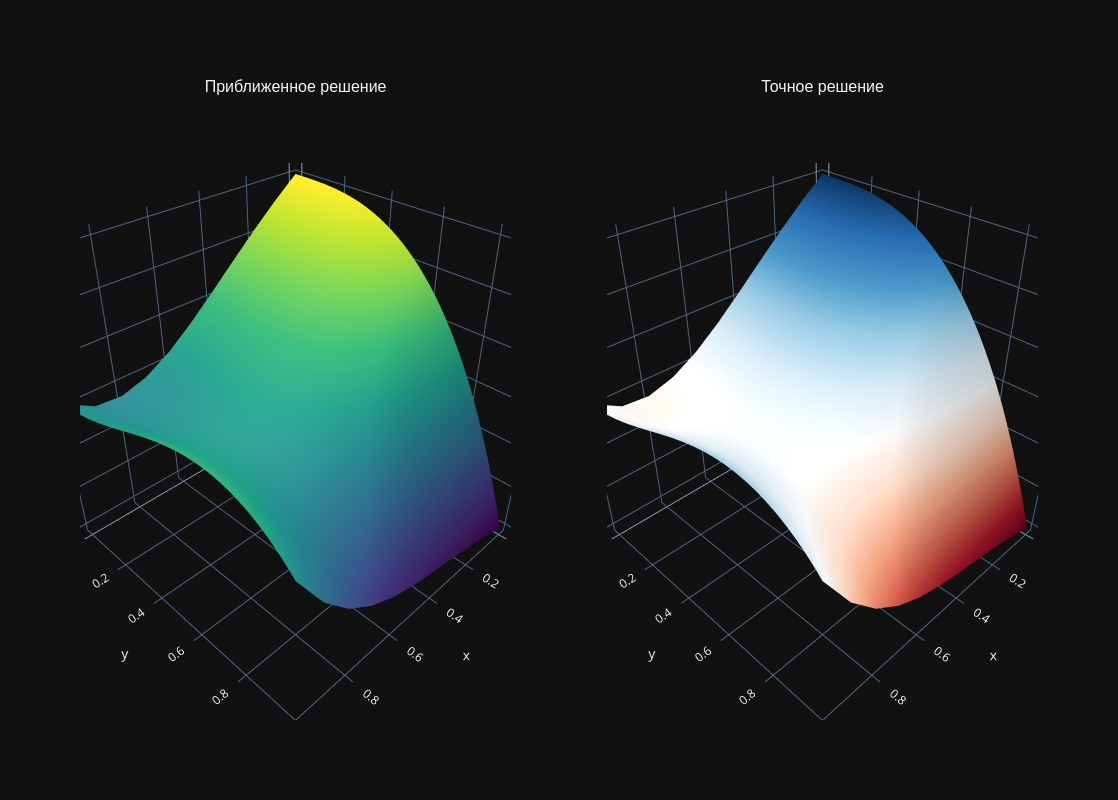

In [9]:
X, Y = np.meshgrid(x, t)
y1 = bw_euler(x,t)

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]], subplot_titles = ["Приближенное решение", "Точное решение"])
    

fig.add_trace(
    go.Surface(x=X, y=Y, z=y1, colorscale='Viridis', showscale=False),
    row=1, col=1)

fig.add_trace(
    go.Surface(x=X, y=Y, z=U(Y,X), colorscale='RdBu', showscale=False),
    row=1, col=2)



fig.update_layout(
    #scene = dict(aspectmode='cube'),
    height=800,
    #width=800
    
    
)
fig.for_each_scene(lambda x: x.update({'aspectmode': 'cube'}))

fig.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11, 1001) and arg 2 with shape (1001, 11).

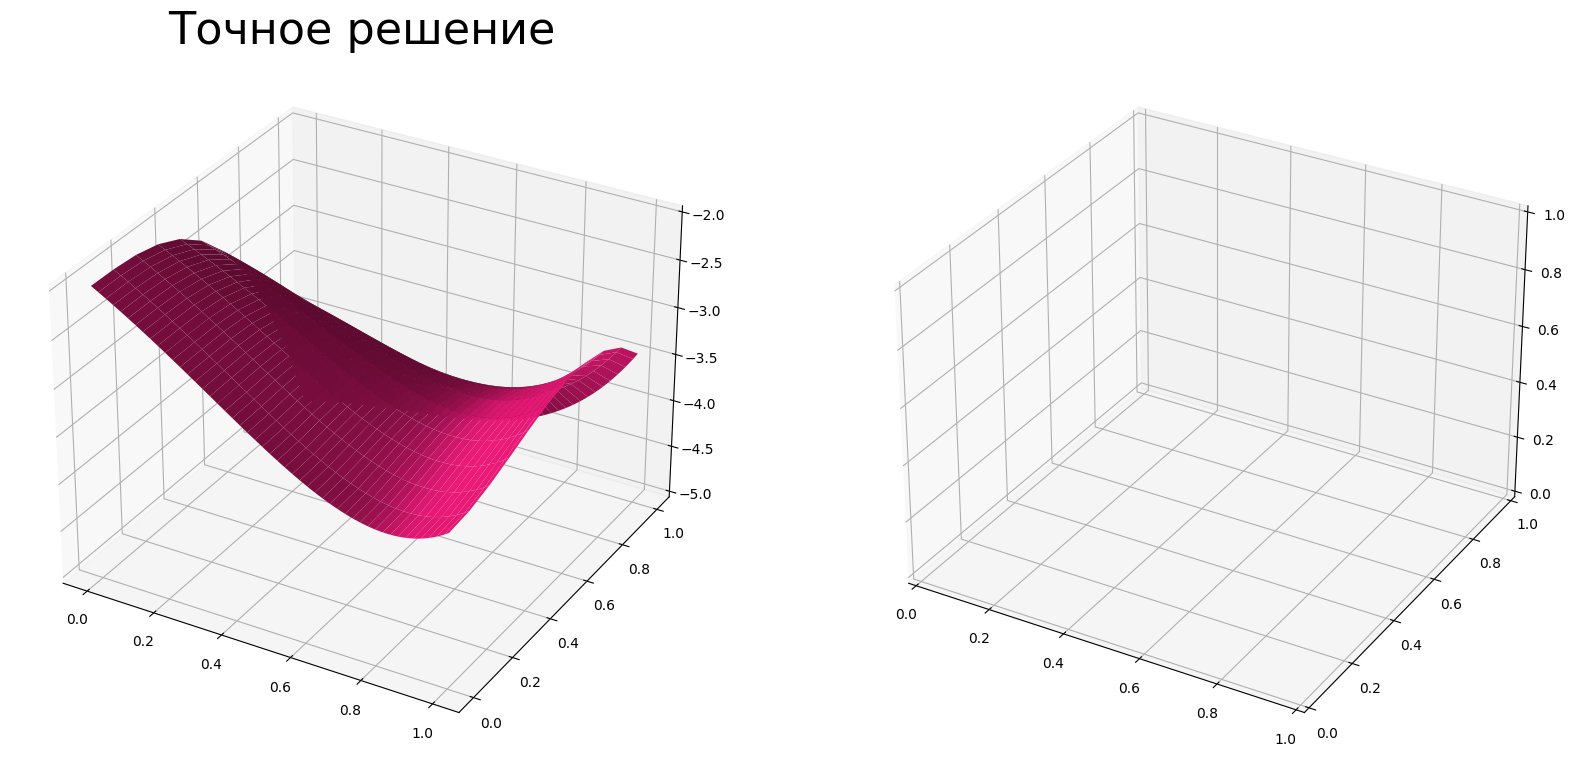

In [8]:
fig, axs = plt.subplots(ncols = 2, nrows = 1, subplot_kw={"projection": "3d"})

fig.set_figheight(20)
fig.set_figwidth(20)




axs[0].plot_surface(X, Y, U(Y, X), color="#F11A7B")
axs[0].set_title("Точное решение", fontsize = 32)

axs[1].plot_surface(X, Y, y1)
axs[1].set_title("Приблеженоое решение", fontsize = 32)

fig.savefig("fig.png")
fig.tight_layout()
plt.show()